In [1]:
import os
print(os.getcwd())
import numpy as np
import random
from sklearn.datasets.mldata import fetch_mldata
from sklearn.linear_model.stochastic_gradient import SGDClassifier
import sklearn.svm
import matplotlib.pyplot as plt
%matplotlib inline



C:\Users\hafez\Desktop\selfTraining\python code


In [2]:
from sklearn import datasets
iris = datasets.load_iris()

X= iris.data
Y= iris.target


In [3]:
#PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
print(pca.explained_variance_ratio_) 

[ 0.92461621  0.05301557]


In [4]:
print(X.shape)
print(iris.feature_names)
print(iris.target_names)

(150, 2)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [5]:
rng = np.random.RandomState(10)
ratio=0.85
YSemi = np.copy(Y)
YSemi[rng.rand(len(Y)) < ratio] = -1


In [6]:
from sklearn import svm
model=svm.SVC(probability=True,C=1.0)

unlabeledX = X[YSemi==-1,:]
YTrue = Y[YSemi==-1]

idx = np.where(YSemi!=-1)[0]
labeledX = X[idx,:]
labeledY = YSemi[idx]

clf=model.fit(labeledX, labeledY)
unlabeledY = clf.predict(unlabeledX)
unlabeledProb = clf.predict_proba(unlabeledX).max(axis=1)

ratioInitial=1-(len(labeledY)/len(Y))
score=sklearn.metrics.accuracy_score(labeledY,clf.predict(labeledX))
print("Labeld accuracy=",score," , Unlabeled ratio=",ratioInitial)

Labeld accuracy= 1.0  , Unlabeled ratio= 0.88


iteration= 42   unlabeled accuracy= 0.94696969697 On initial unlabeled ratio of 0.88


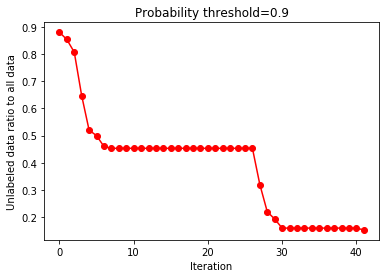

In [7]:
max_iter = 500
probThreshold = 0.9

unlabeledXOrg=np.copy(unlabeledX)
YTrueOrg=np.copy(YTrue)

rr=[]
it=[]

i = 0
while (i < max_iter and score>0.01):
    
    score=sklearn.metrics.accuracy_score(YTrue,unlabeledY)
    ratio=1-(len(labeledY)/len(Y))
    #print("iteration=",i," Unlabeled ratio=", ratio)
    rr.append(ratio); it.append(i)
    
    labelidx = np.where(unlabeledProb >  probThreshold)[0]
    unlabelidx = np.where(unlabeledProb <=  probThreshold)[0]
    
    labeledX=np.vstack((labeledX, unlabeledX[labelidx, :]))
    labeledY=np.hstack((labeledY, unlabeledY[labelidx]))
    unlabeledX=unlabeledX[unlabelidx, :]
    YTrue = Y[unlabelidx]

    clf=model.fit(labeledX,labeledY)
    unlabeledY = clf.predict(unlabeledX)
    unlabeledProb = clf.predict_proba(unlabeledX).max(axis=1)
    i += 1
    
    
    
fig=plt.figure()
title="Probability threshold="+str(probThreshold)
plt.title(title)
plt.xlabel("Iteration")
plt.ylabel("Unlabeled data ratio to all data")
plt.plot(it,rr, 'o-', color="r")
fig.savefig('1.png')

score=sklearn.metrics.accuracy_score(YTrueOrg,clf.predict(unlabeledXOrg))
print("iteration=",i,"  unlabeled accuracy=", score , "On initial unlabeled ratio of",ratioInitial)


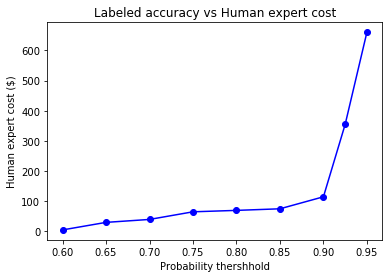

In [8]:
#Assumption cost per label = $5.0
costPerlabel=5.0
probTh=np.array([0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.925,0.95])
ratioToBeLabeled=np.array([0.0067,0.04,0.053,0.0867,0.093,0.1,0.153,0.473,0.88])
cost=ratioToBeLabeled*len(Y)*costPerlabel

fig=plt.figure()
plt.title("Labeled accuracy vs Human expert cost")
plt.xlabel("Probability thershhold")
plt.ylabel("Human expert cost ($)")
plt.plot(probTh,cost, 'o-', color="b")
fig.savefig('2.png')

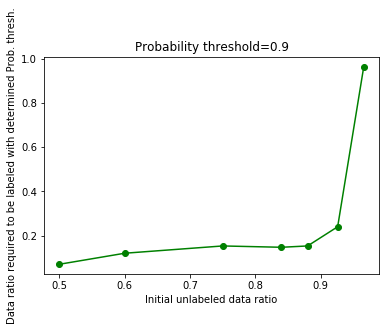

In [9]:
intialUnlabeledratio=np.array([0.5,0.6,0.75,0.84,0.88,0.926,0.966])
ratioToBeLabeled=np.array([0.07,0.12,0.153,0.147,0.153,0.24,0.966])

fig=plt.figure()
plt.title("Probability threshold=0.9")
plt.xlabel("Initial unlabeled data ratio")
plt.ylabel("Data ratio required to be labeled with determined Prob. thresh.")
plt.plot(intialUnlabeledratio,ratioToBeLabeled, 'o-', color="g")
fig.savefig('3.png')

In [10]:
from sklearn.semi_supervised import label_propagation
import matplotlib.pyplot as plt

lp_model = label_propagation.LabelSpreading(gamma=0.25, max_iter=200)
lp_model.fit(X, YSemi)

predicted_labels = lp_model.transduction_[YSemi==-1]
true_labels = Y[YSemi==-1]


score=sklearn.metrics.accuracy_score(true_labels,predicted_labels)
print("unlabeled accuracy=", score , "On initial unlabeled ratio of",ratioInitial," using label propagation method from sklearn")

unlabeled accuracy= 0.893939393939 On initial unlabeled ratio of 0.88  using label propagation method from sklearn
